# MRI brain tumor detection

Kaggle dataset: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection

In [32]:
import numpy as np
import torch
import glob
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import cv2

## 1. Reading data

In [33]:
tumor = []
healthy = []
path = './archive/yes/*.jpg'
path_healthy = './archive/no/*.jpg'

In [34]:
for file in glob.iglob(path):
    img = cv2.imread(file)
    img = cv2.resize(img, (128,128))
    b, g, r = cv2.split(img)
    img = cv2.merge([r, g, b])
    tumor.append(img)

In [35]:
for file in glob.iglob(path_healthy):
    img = cv2.imread(file)
    img = cv2.resize(img, (128,128))
    b, g, r = cv2.split(img)
    img = cv2.merge([r, g, b])
    healthy.append(img)

In [36]:
healthy = np.array(healthy)
tumor = np.array(tumor)
all_cases = np.concatenate((healthy, tumor))

## 2. Visualizing images

In [37]:
def random_images(arr1, arr2, num):

    # Ensure num doesn't exceed the available images in either array
    num = min(num, len(arr1), len(arr2))

    # Select 'num' random images from 'arr1' and 'arr2'
    indices1 = np.random.choice(len(arr1), num, replace=False)
    indices2 = np.random.choice(len(arr2), num, replace=False)
    selected_images1 = arr1[indices1]
    selected_images2 = arr2[indices2]

    # Define figure size dynamically based on 'num'
    plt.figure(figsize=(num * 2, 5))

    # Plot first row (arr1 images)
    for i in range(num):
        plt.subplot(2, num, i + 1)
        plt.imshow(selected_images1[i])
        plt.axis("off")
        plt.title(f"Arr1 Img {i+1}")

    # Plot second row (arr2 images)
    for i in range(num):
        plt.subplot(2, num, num + i + 1)
        plt.imshow(selected_images2[i])
        plt.axis("off")
        plt.title(f"Arr2 Img {i+1}")

    plt.show()

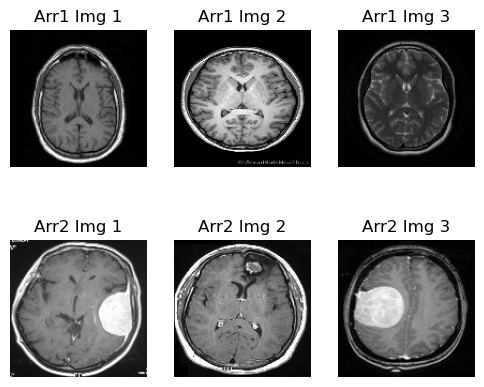

In [38]:
random_images(healthy, tumor, 3)